## Основы анализа данных

## Домашнее задание 5

### О задании

1) Find two features in your dataset with more or less “linear-like” scatterplot.

2) Display the scatter-plot.

3) Build a linear regression of one of the features over the other. Make a comment on the meaning of the slope.

4) Find the correlation and determinacy coefficients, and comment on the meaning of the latter.

5) Make a prediction of the target values for given two or three predictor’ values; make a comment.

6) Compare the mean relative absolute error of the regression on all points of your set and the determinacy coefficient and make comments.


Для начала подключим ряд библиотек, которые мы будем использовать в последствии.

In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score

Загрузим данные

In [2]:
practice_data = pandas.read_csv('../../data/Vehicles0515.csv')
practice_data = practice_data.replace(-1, np.NaN)
practice_data = practice_data.dropna(subset=['Age_of_Driver', 'Driving_Experience'])
practice_data.head()

NameError: name 'pandas' is not defined

В качестве пары линейнозависимых признаков я выбрал стаж и возраст водителя

In [1]:
def pair_plot(x_data, y_data):
    f, (ax2) = plt.subplots(1, 1, figsize=(13, 5))
    
    ax2.scatter(x_data, y_data)
    ax2.set_xlabel("Age_of_Driver")
    ax2.set_ylabel("Driving_Experience")
    ax2.grid()

pair_plot(practice_data['Age_of_Driver'].values, practice_data['Driving_Experience'].values)

NameError: name 'practice_data' is not defined

Можно видеть, что зависимость скорее похожа на корень. Попробуем возвести возраст водителя в степень 1.5. 

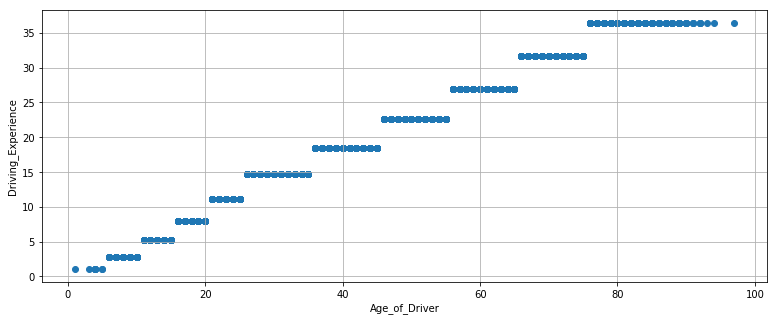

In [6]:
def pair_plot(x_data, y_data):
    f, (ax2) = plt.subplots(1, 1, figsize=(13, 5))
    
    ax2.scatter(x_data, y_data)
    ax2.set_xlabel("Age_of_Driver")
    ax2.set_ylabel("Driving_Experience")
    ax2.grid()

pair_plot(practice_data['Age_of_Driver'].values, practice_data['Driving_Experience'].values ** 1.5)

Теперь построим линейную регрессию, которая бы предсказывала ожидаемый стаж водителя по его возрасту.

In [7]:
import warnings
warnings.filterwarnings("ignore")

import sklearn.linear_model as lm

x_train = practice_data['Age_of_Driver']
x_train = x_train.reshape(len(x_train), 1)
y_train = practice_data['Driving_Experience'] ** 1.5

regression = lm.LinearRegression()
regression.fit(x_train, y_train)
print("regression slope:", regression.coef_)

regression slope: [0.42488886]


Таким образом, получилась линейная регрессия, которая вывела приближенную формулу для стажа водителя относительно его возраста:

$$Experience = 0.42 * \sqrt{Age^{3}}$$